In [12]:
%matplotlib inline

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc

import os
import random
import pickle

In [13]:
imageFolder = "-catsdogs"

folders = os.listdir(imageFolder)
num_categories = len(folders)

folders.remove('.DS_Store')

print folders

['0', '1']


In [14]:
# specify desired image properties
# in this case we want black and white square images 64x64 pixels in size
image_dim = 1 # black and white
image_size = 64

# create an empty array to store the image data
data = []

# look inside each folder which represents the categories of our data
for folder in folders:
    
    # find the files within each folder
    fileNames = os.listdir("/".join([imageFolder, folder]))
    
    # for each file, load and process each image
    # in this case we limit the number of images used per cateogry to 10,000
    # to prevent overloading our RAM memory
    for fileName in fileNames[:10000]:
        
        # read in the image data into a numpy array
        img = misc.imread("/".join([imageFolder, folder, fileName]))
        
        # if the image contains more than one color channel,
        # take only the first channel (in effect, convert it to black and white)
        if image_dim == 1 and len(img.shape) > 2: 
            img = img[:,:,0] # convert to black and white

        # resize to target resolution if necessary
        if img.shape[0] != image_size or img.shape[1] != image_size:
            img = misc.imresize(img, (image_size, image_size), interp='nearest')

        # normalize data to have mean 0 and standard deviation 1
        # then rescale it to roughly the range 0-1
        img = (img - img.mean()) / img.std() / 4 + 0.5
        
        # add the image data and the associated category 
        # (which is stored in the folder variable) to the data set
        # for this to work you need to make sure your folders 
        # are named sequentially starting with 0
        data.append([img, folder])

print "Load data complete"

Load data complete


In [15]:
random.shuffle(data)

In [16]:
X = np.ndarray((len(data), image_size, image_size), dtype=np.float32)
y = np.ndarray((len(data), 1), dtype=np.int32)

for i, d in enumerate(data):
    X[i] = d[0]
    y[i] = d[1]

image dimensions: (64, 64)
target category: dog


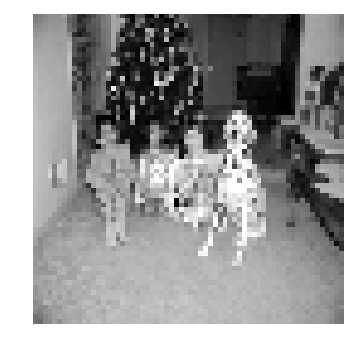

In [17]:
img_index = 2

img = X[img_index]
print "image dimensions:", img.shape
print "target category:", (['cat', 'dog'][y[img_index][0]])

imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()

In [18]:
trainingSplit = int(.7 * X.shape[0])

X_train = X[:trainingSplit]
y_train = y[:trainingSplit]
X_test = X[trainingSplit:]
y_test = y[trainingSplit:]

In [19]:
pickle_file = imageFolder + '.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print 'Unable to save data to', pickle_file, ':', e
    raise
    
statinfo = os.stat(pickle_file)
print 'Saved data to', pickle_file
print 'Compressed pickle size:', statinfo.st_size

Saved data to -catsdogs.pickle
Compressed pickle size: 327760375
